In [99]:
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly

In [101]:
def Box_Muller(n):
    u1=np.random.random(n)
    u2=np.random.random(n)
    r=np.sqrt(-2*np.log(u1))
    theta=2*np.pi*u2
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return x,y
    

In [151]:
n=1000
(x,y)=Box_Muller(n)

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\Users\Charollina\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



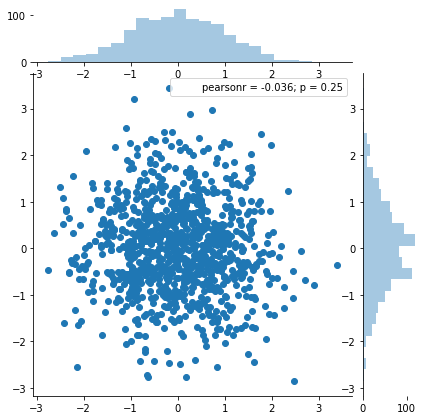

In [152]:
sns.jointplot(x, y, kind='scatter')

In [155]:
def test_norm_bm(n):
    from scipy import stats
    import pandas as pd
    (x,y)=Box_Muller(n)
    stat_x, p_x_chi=stats.normaltest(x)
    stat_y, p_y_chi=stats.normaltest(y)
    D_x, p_x_ks=stats.kstest(x, 'norm')
    D_y, p_y_ks=stats.kstest(y, 'norm')
    p_value={"p-value x":[p_x_chi, p_x_ks], "p-valye y":[p_y_chi, p_y_ks]}
    df=pd.DataFrame(data=p_value, index=["chi^2", "Kolmogorov-Smirnov"])
    return df

In [156]:
test_norm_bm(n)

,p-value x,p-valye y
chi^2,0.844321,0.890376
Kolmogorov-Smirnov,0.068199,0.530162


In [141]:
#two_sample_test=ss.ttest_ind(x,y)

In [142]:
'''matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', two_sample_test[0], two_sample_test[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)

py.iplot(twosample_table, filename='twosample-table')'''

"matrix_twosample = [\n    ['', 'Test Statistic', 'p-value'],\n    ['Sample Data', two_sample_test[0], two_sample_test[1]]\n]\n\ntwosample_table = FF.create_table(matrix_twosample, index=True)\n\npy.iplot(twosample_table, filename='twosample-table')"